# Random forest

Un Random Forest es un modelo de aprendizaje automático que se usa tanto para clasificación como para regresión, y se basa en la idea de construir muchos árboles de decisión y combinar sus resultados para hacer predicciones más precisas, estables y resistentes al sobreajuste.

🌲 ¿Cómo funciona un Random Forest?
1. 🔁 Crea múltiples árboles de decisión (a esto se le llama ensemble).

2. 🌱 Cada árbol se entrena con una muestra aleatoria de los datos (con reemplazo, técnica llamada bootstrap).

3. 📊 En cada división del árbol, se selecciona un subconjunto aleatorio de variables.

4. ✅ Para clasificación: se toma la votación mayoritaria de todos los árboles.

5. 📈 Para regresión: se calcula el promedio de las predicciones de todos los árboles.


In [3]:
from sklearn import tree
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv(r"C:\Users\steve\OneDrive\Documentos\python\base_datos_2008.csv")


In [ ]:
df = df.dropna(subset=["ArrDelay"])
df = df.sample(frac=1)
dftest = df.tail(500000)
df = df.head(500000)

In [ ]:
clf = tree.DecisionTreeClassifier()

X = df[["Distance", "AirTime", "DepTime","TaxiIn", "TaxiOut", "DepDelay"]]
X_test = dftest[["Distance", "AirTime", "DepTime","TaxiIn", "TaxiOut", "DepDelay"]]
Y = df["ArrDelay"] > 10
Y_test = dftest["ArrDelay"] > 10

clf = clf.fit(X,Y)
Y_predic_test = clf.predict(X)

In [12]:
np.mean(Y_test == Y_predic_test)

np.float64(0.89345)

In [13]:
X

,Distance,AirTime,DepTime,TaxiIn,TaxiOut,DepDelay
3145049,196,36.0,1102.0,2.0,50.0,75.0
4858573,407,65.0,1235.0,5.0,29.0,5.0
4342553,643,94.0,1323.0,4.0,13.0,-2.0
4283460,332,46.0,2034.0,5.0,7.0,-6.0
1111654,261,46.0,1859.0,4.0,13.0,-11.0
...,...,...,...,...,...,...
5174719,292,78.0,800.0,18.0,20.0,-5.0
2327726,1185,147.0,1847.0,5.0,24.0,132.0
5421111,397,69.0,619.0,4.0,12.0,9.0
18657,920,127.0,1627.0,4.0,9.0,7.0


In [16]:
clf = RandomForestClassifier(n_estimators=150, n_jobs= -1)
clf.fit(X,Y)
Y_predic_test = clf.predict(X_test)

clf.feature_importances_
# n_estimator / max_features / bootstrap / n_jobs

array([0.09159647, 0.0811802 , 0.08350001, 0.05072639, 0.1328234 ,
       0.56017353])

In [17]:
np.mean(Y_test == Y_predic_test)

np.float64(0.923978)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Exactitud:", accuracy_score(Y_test, Y_predic_test))
print("Matriz de confusión:\n", confusion_matrix(Y_test, Y_predic_test))
print("Reporte de clasificación:\n", classification_report(Y_test, Y_predic_test))


Exactitud: 0.923978
Matriz de confusión:
 [[355927  12724]
 [ 25287 106062]]
Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.93      0.97      0.95    368651
        True       0.89      0.81      0.85    131349

    accuracy                           0.92    500000
   macro avg       0.91      0.89      0.90    500000
weighted avg       0.92      0.92      0.92    500000



# Resumen 

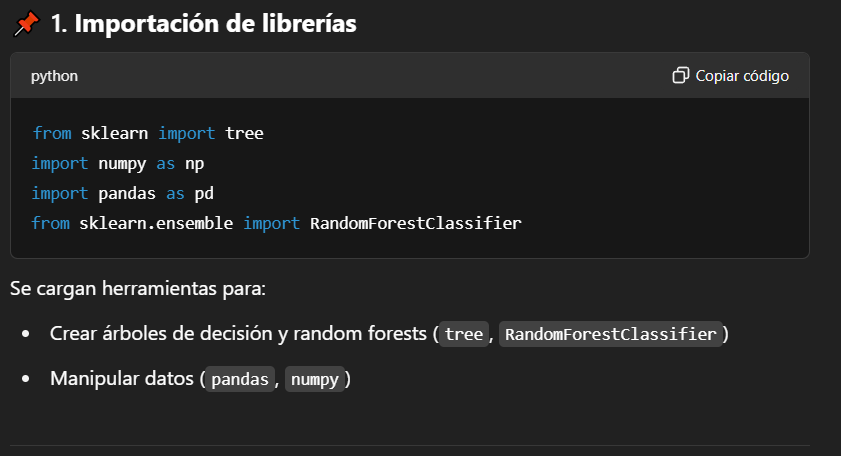
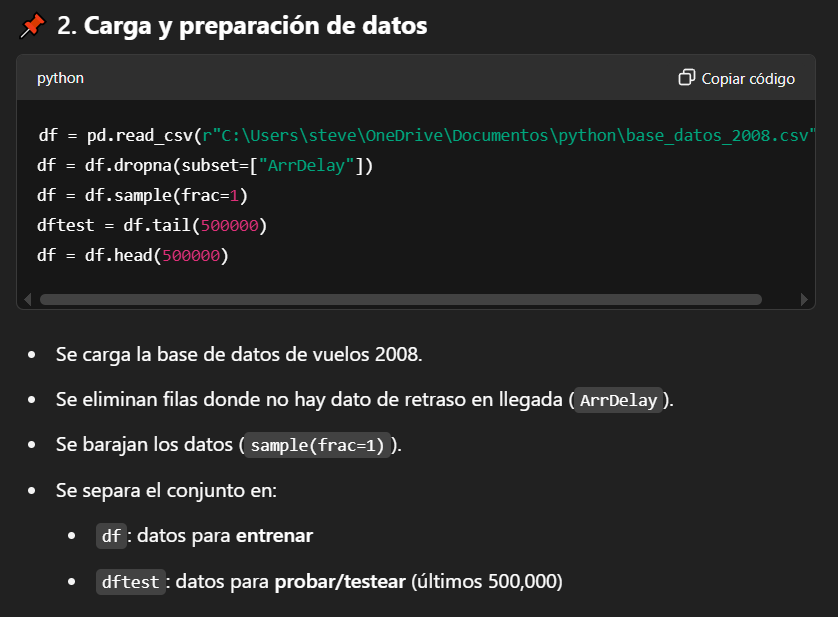
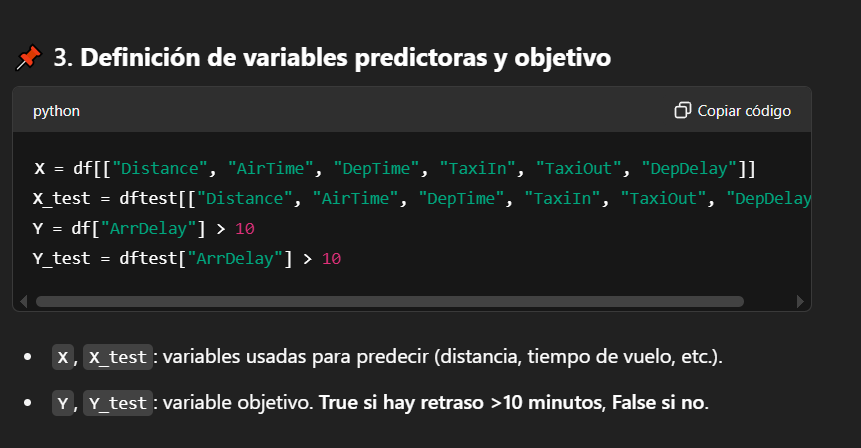
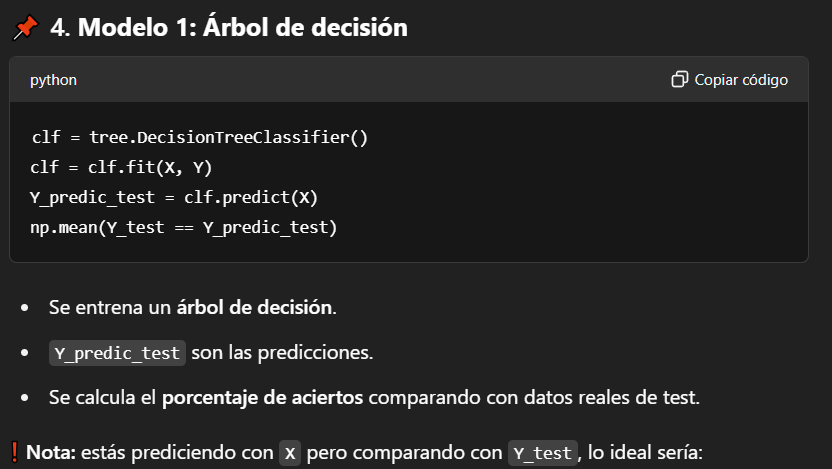
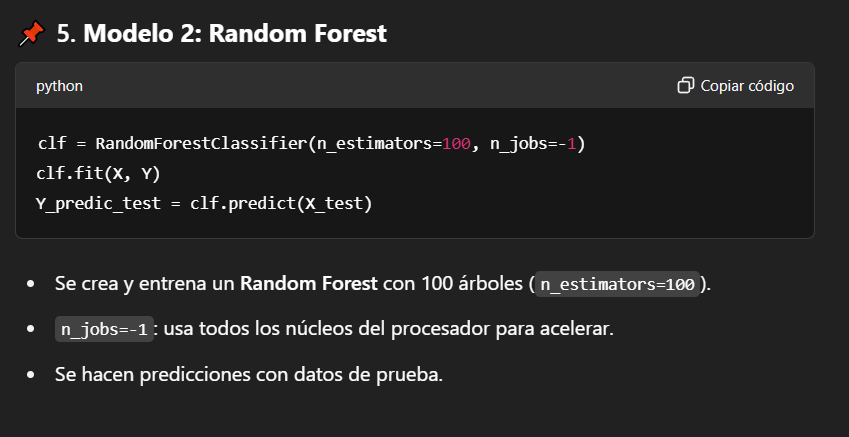
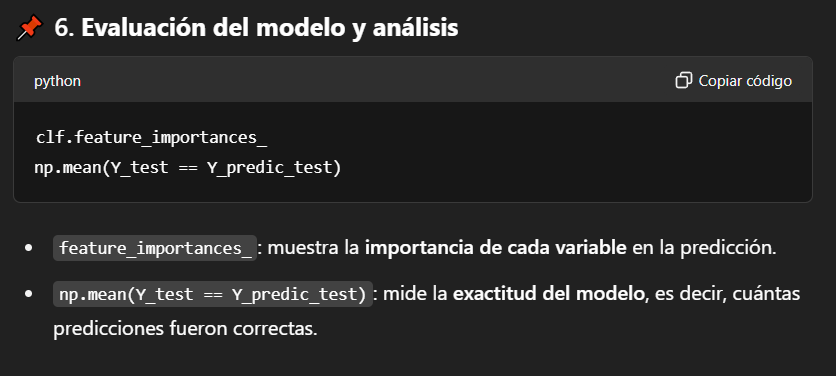
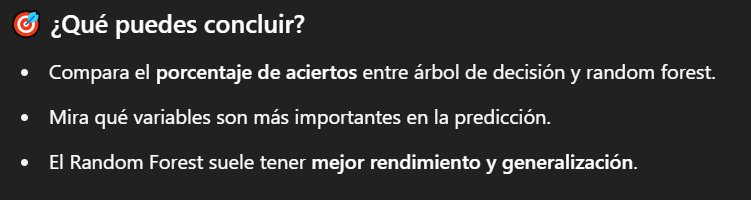